In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fastparquet import ParquetFile

In [53]:
file_path = "Data/train_ai_comp_final_dp.parquet"
pf = ParquetFile(file_path)
df = pf.to_pandas()
df.head()

,id,target,sample_ml_new,feature1,feature2,feature3,feature4,feature5,feature6,feature7,...,feature1067,feature1068,feature1069,feature1070,feature1071,feature1072,feature1073,feature1074,feature1075,feature1076
0,0,0,1,1761,1759,85,105469,191,46,0,...,28913,48985,84264,12045,12107,12510,21126,28913,48985,84264
1,1,0,1,1761,1759,120,105610,144,71,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,1,890,1759,141,105227,191,11,0,...,55949,70006,113317,33735,31242,12691,48682,55949,70006,113317
5,5,0,1,1599,966,30,102441,191,8,0,...,0,6872,8530,0,0,0,0,0,6872,8530
6,6,0,1,1761,1759,85,104006,191,2,0,...,0,0,7642,0,0,0,0,0,0,7642


In [57]:
df.describe()

MemoryError: Unable to allocate 4.17 GiB for an array with shape (1077, 519615) and data type int64

In [5]:
df.head()

,id,target,sample_ml_new,feature1,feature2,feature3,feature4,feature5,feature6,feature7,...,feature1067,feature1068,feature1069,feature1070,feature1071,feature1072,feature1073,feature1074,feature1075,feature1076
0,0,0,1,1761,1759,85,105469,191,46,0,...,28913,48985,84264,12045,12107,12510,21126,28913,48985,84264
1,1,0,1,1761,1759,120,105610,144,71,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,1,890,1759,141,105227,191,11,0,...,55949,70006,113317,33735,31242,12691,48682,55949,70006,113317
5,5,0,1,1599,966,30,102441,191,8,0,...,0,6872,8530,0,0,0,0,0,6872,8530
6,6,0,1,1761,1759,85,104006,191,2,0,...,0,0,7642,0,0,0,0,0,0,7642


In [6]:
(df.dtypes).value_counts()

int64      1077
float64       2
Name: count, dtype: int64

In [7]:
df.columns[df.isna().any()]

Index(['feature642', 'feature756'], dtype='object')

In [8]:
df = df.drop('feature756', axis=1)

In [9]:
name_categ = df.columns[df.max() - df.min() <= 1]

In [10]:
df_categ = df[name_categ]

df_categ

,target,sample_ml_new,feature68,feature69,feature144,feature160,feature245,feature292,feature384,feature385,...,feature1025,feature1026,feature1027,feature1028,feature1029,feature1030,feature1031,feature1032,feature1033,feature1034
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693036,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
693038,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
693039,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
693040,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
np.unique(df_categ)

array([ 0.,  1., nan])

In [12]:
name_continous = df.columns[df.max() - df.min() > 1]

In [33]:
counts_zero_to_columns = (df[name_continous] == 0).sum(axis=0)
print(counts_zero_to_columns.sort_values())

feature219          0
feature883          0
feature882          0
feature319          0
feature318          0
                ...  
feature1058    519140
feature1037    519140
feature216     519177
feature224     519191
feature215     519249
Length: 847, dtype: int64


<Axes: >

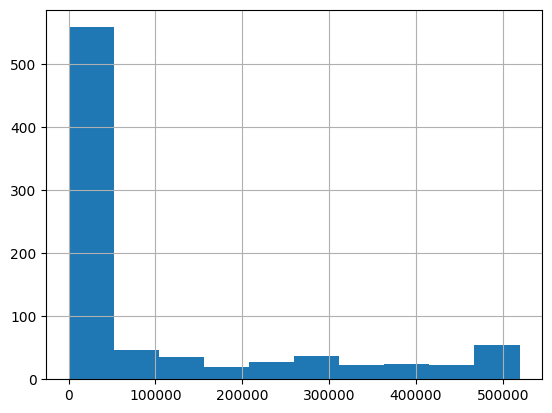

In [35]:
# распределение значений = 0
(df[name_continous].shape[0] - df[name_continous][df[name_continous] != 0].count()).hist()

In [43]:
T_df = df.T
T_df.head()

MemoryError: Unable to allocate 4.17 GiB for an array with shape (1078, 519615) and data type float64

,id,target,sample_ml_new,feature1,feature2,feature3,feature4,feature5,feature6,feature7,...,feature1067,feature1068,feature1069,feature1070,feature1071,feature1072,feature1073,feature1074,feature1075,feature1076
0,0,0,1,1761,1759,85,105469,191,46,0,...,28913,48985,84264,12045,12107,12510,21126,28913,48985,84264
1,1,0,1,1761,1759,120,105610,144,71,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,1,890,1759,141,105227,191,11,0,...,55949,70006,113317,33735,31242,12691,48682,55949,70006,113317
5,5,0,1,1599,966,30,102441,191,8,0,...,0,6872,8530,0,0,0,0,0,6872,8530
6,6,0,1,1761,1759,85,104006,191,2,0,...,0,0,7642,0,0,0,0,0,0,7642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693036,693036,0,1,1761,1759,141,410,191,2,125,...,0,0,0,0,0,0,0,0,0,0
693038,693038,0,1,1761,1759,0,170,191,1,125,...,0,0,0,0,0,51714,0,0,0,0
693039,693039,0,1,1761,1759,0,168,191,1,125,...,0,0,0,0,0,51714,0,0,0,0
693040,693040,0,1,1761,1759,141,74,191,1,125,...,0,0,0,0,0,51714,0,0,0,0
